<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

As part of the ad-hoc review of the education system, we (USA Ministry of Education) would like to find out if the current education system in the USA is fair and if not, what can we do to improve the education system. We hypothesize that students from higher household income have better performances on the SAT and ACT, compared to students from lower household income. 

This project seeks to identify if a relationship exists between student annual household income and SAT/ACT scores; and if these tests are a accurate measure of a students' abillity or if there exist a biasness due to socioeconomic differences.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

The following 7 datasets will be used to complete the analysis:

> 1. [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
> 2. [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
> 3. [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
> 4. [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State ([source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
> 5. [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State ([source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
> 6. [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State ([source](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent))
> 7. [`household income.csv`](../data/household_income.csv): Median annual household income by State from year 2017 to 2019 ([*source*](https://nces.ed.gov/programs/digest/d20/tables/dt20_102.30.asp))

### Outside Research

Research has repeatedly proved that students from wealthy families score higher on the SAT and ACT, compared to students from low-income families. According to a 2015 analysis by Inside Higher Ed, the lowest average scores for each part of the SAT came from students with less than $20,000 in family income. The highest scores came from those with more than \\$200,000 in family income ([*source*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def calc_mean(x):
    total = 0
    for i in x:
        total += i 
    mean = total/len(x)
    return mean

In [2]:
test_list = [2,3,4,5,6]

In [3]:
calc_mean(test_list)

4.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [4]:
def calc_sd(x):
    y = 0
    mean = calc_mean(x)
    n = len(x)
    for i in x: 
        y += (i - mean) ** 2
    sd = (1/n * y)**0.5
    return sd

In [5]:
calc_sd(test_list)

1.4142135623730951

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [6]:
def data_cleaning(x):
    return float(x.split('%')[0])/100

In [7]:
data_cleaning('30.5%')

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [9]:
act_2017_df = pd.read_csv('../data/act_2017.csv')
sat_2017_df = pd.read_csv('../data/sat_2017.csv')
act_2018_df = pd.read_csv('../data/act_2018.csv')
sat_2018_df = pd.read_csv('../data/sat_2018.csv')
act_2019_df = pd.read_csv('../data/act_2019.csv')
sat_2019_df = pd.read_csv('../data/sat_2019.csv')
income_df = pd.read_csv('../data/household_income.csv')

In [10]:
act_2017_df.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [11]:
act_2017_df.drop(columns = ['English','Math','Reading','Science'], inplace = True)

In [12]:
act_2018_df.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [13]:
act_2019_df.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [14]:
sat_2017_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [15]:
sat_2017_df.drop(columns = ['Evidence-Based Reading and Writing','Math'], inplace =True)

In [16]:
sat_2018_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [17]:
sat_2018_df.drop(columns = ['Evidence-Based Reading and Writing','Math'], inplace =True)

In [18]:
sat_2019_df.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [19]:
sat_2019_df.drop(columns = ['EBRW','Math'], inplace =True)

In [20]:
income_df.head()

,State,2017,2018,2019
0,Alabama,"50,200","50,800","51,700"
1,Alaska,"76,300","75,700","75,500"
2,Arizona,"59,000","60,300","62,100"
3,Arkansas,"47,800","47,900","49,000"
4,California,"74,900","76,600","80,400"


In [21]:
income_df2 = pd.concat([income_df[['State']]]*3,axis = 0).reset_index(drop = True)

In [22]:
income_df3 = pd.concat([income_df2,pd.melt(income_df[['2017','2018','2019']])],axis = 1)

In [23]:
income_df3.head()

,State,variable,value
0,Alabama,2017,"50,200"
1,Alaska,2017,"76,300"
2,Arizona,2017,"59,000"
3,Arkansas,2017,"47,800"
4,California,2017,"74,900"


In [24]:
sat_2017_df.columns = ['state','participation_rate','score']
act_2017_df.columns = ['state','participation_rate','score']
sat_2018_df.columns = ['state','participation_rate','score']
act_2018_df.columns = ['state','participation_rate','score']
sat_2019_df.columns = ['state','participation_rate','score']
act_2019_df.columns = ['state','participation_rate','score']
income_df3.columns = ['state','year','income']

In [25]:
sat_2017_df['year'] = '2017'
act_2017_df['year'] = '2017'
sat_2018_df['year'] = '2018'
act_2018_df['year'] = '2018'
sat_2019_df['year'] = '2019'
act_2019_df['year'] = '2019'

In [26]:
sat_2017_df['test'] = 'SAT'
act_2017_df['test'] = 'ACT'
sat_2018_df['test'] = 'SAT'
act_2018_df['test'] = 'ACT'
sat_2019_df['test'] = 'SAT'
act_2019_df['test'] = 'ACT'

In [27]:
df = (pd.concat([sat_2017_df,act_2017_df,sat_2018_df,act_2018_df,sat_2019_df,act_2019_df])).reset_index(drop = True)

In [28]:
df.head()

,state,participation_rate,score,year,test
0,Alabama,5%,1165,2017,SAT
1,Alaska,38%,1080,2017,SAT
2,Arizona,30%,1116,2017,SAT
3,Arkansas,3%,1208,2017,SAT
4,California,53%,1055,2017,SAT


In [29]:
df2 = pd.merge(df,income_df3,on = ['state','year'], how = 'inner')

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   state               150 non-null    object
 1   participation_rate  150 non-null    object
 2   score               150 non-null    object
 3   year                150 non-null    object
 4   test                150 non-null    object
 5   income              150 non-null    object
dtypes: object(6)
memory usage: 8.2+ KB


In [31]:
df2['participation_rate'] = df2['participation_rate'].map(data_cleaning)

In [32]:
df2['score'] = df2['score'].astype('float')

In [33]:
#Convert annual_income into float 
def convert_income(x):
    return int(x.replace(',',''))

df2['income'] = df2['income'].map(convert_income)

In [34]:
df2.head()

,state,participation_rate,score,year,test,income
0,Alaska,0.38,1080.0,2017,SAT,76300
1,Alaska,0.65,19.8,2017,ACT,76300
2,Arkansas,0.03,1208.0,2017,SAT,47800
3,Arkansas,1.00,19.4,2017,ACT,47800
4,California,0.53,1055.0,2017,SAT,74900


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               150 non-null    object 
 1   participation_rate  150 non-null    float64
 2   score               150 non-null    float64
 3   year                150 non-null    object 
 4   test                150 non-null    object 
 5   income              150 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 8.2+ KB


In [36]:
df2.describe()

,participation_rate,score,income
count,150.000000,150.000000,150.000000
mean,0.515467,571.061333,63720.666667
std,0.352619,555.020344,12056.050845
min,0.020000,17.700000,44900.000000
25%,0.200000,21.600000,55800.000000
50%,0.505000,484.250000,60750.000000
75%,0.817500,1096.250000,74900.000000
max,1.000000,1298.000000,92300.000000


In [37]:
df2.to_csv('../data/merged_df.csv', index = False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|2017 - 2019 ACT and SAT|The various states of United State of America.| 
|participation_rate|float|2017 - 2019 ACT and SAT|The participation rate of the tests (SAT/ACT) of that particular state (units percent to two decimal places 98.10 means 98.1%.| 
|score|float|2017 - 2019 ACT and SAT|The total SAT score for SAT (EBRW and Math, range: 400 - 1,600) and the composite score for ACT [average of the four test scores (English, mathematics, reading, science), range: 1 - 36].| 
|year|object|2017 - 2019 ACT and SAT|Year ranging from 2017 to 2019.| 
|test|object|2017 - 2019 ACT and SAT|Which test (SAT or ACT).| 
|income|integer|Median Annual Household Income|The median annual household income for the various USA States from 2017 to 2019.| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [38]:
df2.describe()

,participation_rate,score,income
count,150.000000,150.000000,150.000000
mean,0.515467,571.061333,63720.666667
std,0.352619,555.020344,12056.050845
min,0.020000,17.700000,44900.000000
25%,0.200000,21.600000,55800.000000
50%,0.505000,484.250000,60750.000000
75%,0.817500,1096.250000,74900.000000
max,1.000000,1298.000000,92300.000000


In [39]:
dict1 = df2.drop(['state','test','year'],axis=1).to_dict()

In [40]:
sd = {item: round(calc_sd(df2[item].to_list()),2) for (item, value) in dict1.items()}
sd

{'participation_rate': 0.35, 'score': 553.17, 'income': 12015.8}

In [41]:
sat_df = df2[df2['test'] == 'SAT']

In [42]:
act_df = df2[df2['test'] == 'ACT']

In [43]:
act_df.sort_values('income', ascending = False).head()

,state,participation_rate,score,year,test,income
107,District of Columbia,0.32,23.5,2019,ACT,92300
7,District of Columbia,0.32,24.2,2017,ACT,85900
115,Massachusetts,0.21,25.5,2019,ACT,85800
129,New Jersey,0.25,24.2,2019,ACT,85800
29,New Jersey,0.34,23.9,2017,ACT,83500


In [44]:
act_df.sort_values('income', ascending = False).head()['score'].mean()

24.26

In [45]:
act_df.sort_values('income', ascending = True).head()

,state,participation_rate,score,year,test,income
99,West Virginia,0.65,20.3,2018,ACT,44900
49,West Virginia,0.69,20.4,2017,ACT,45300
21,Mississippi,1.00,18.6,2017,ACT,45400
71,Mississippi,1.00,18.6,2018,ACT,45500
121,Mississippi,1.00,18.4,2019,ACT,45800


In [46]:
act_df.sort_values('income', ascending = True).head()['score'].mean()

19.26

From the two tables above, it seems like states with higher income have higher mean ACT scores (24.26 vs 19.26).

In [47]:
sat_df.sort_values('income', ascending = False).head()['score'].mean()

1022.4

In [48]:
sat_df.sort_values('income', ascending = True).head()['score'].mean()

1160.0

However for SAT scores, states with higher income had a lower mean SAT score.

In [49]:
act_df.sort_values('score', ascending = False).head()['income'].mean() #mean income of those with higher ACT scores

80120.0

In [50]:
act_df.sort_values('score', ascending = True).head()['income'].mean()#mean income of those with lower ACT scores

56520.0

In [51]:
sat_df.sort_values('score', ascending = False).head()['income'].mean() #mean income of those with higher SAT scores

67620.0

In [52]:
sat_df.sort_values('score', ascending = True).head()['income'].mean() #mean income of those with lower SAT scores

71740.0

Income seems to be correlated to the ACT scores but not the SAT scores. 

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0.5, 1.08, 'No visible relationships between the variables')

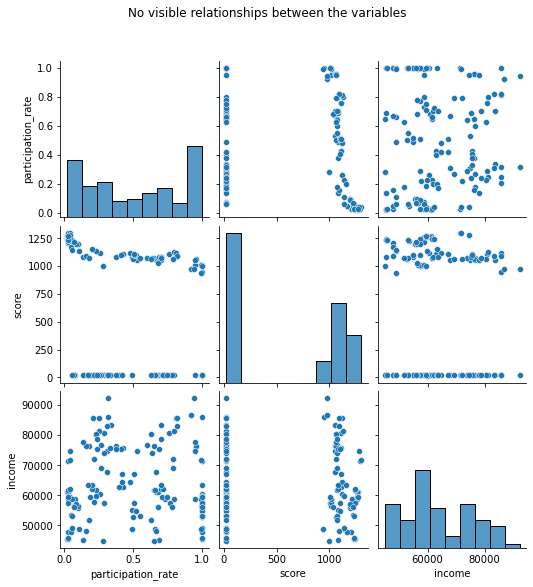

In [53]:
g = sns.pairplot(df2)
g.fig.suptitle("No visible relationships between the variables", y=1.08)

Text(0.5, 1.08, 'Income increases as ACT score increases')

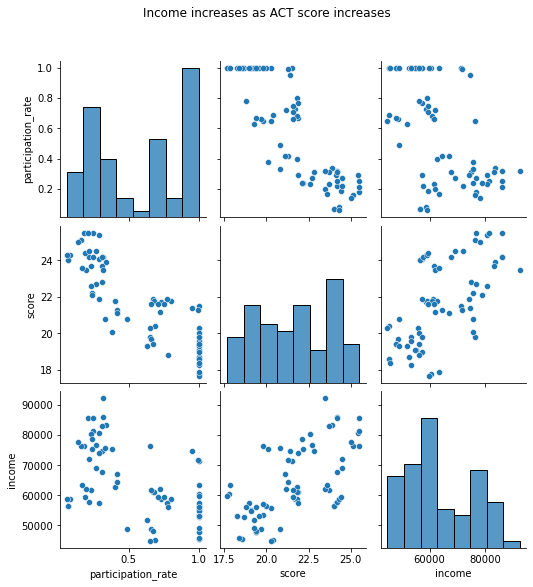

In [54]:
g = sns.pairplot(act_df)
g.fig.suptitle("Income increases as ACT score increases", y=1.08)

Text(0.5, 1.08, 'Income increases as SAT participation rate increase \n SAT Score decreases as SAT participation rate increases')

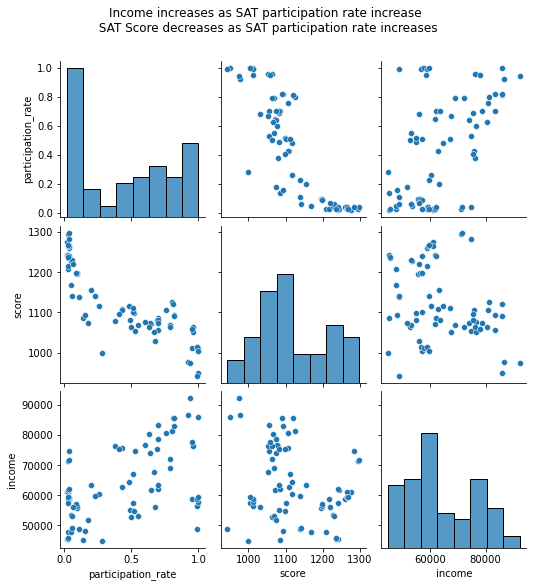

In [55]:
g = sns.pairplot(sat_df)
g.fig.suptitle("Income increases as SAT participation rate increase \n SAT Score decreases as SAT participation rate increases", y=1.08)

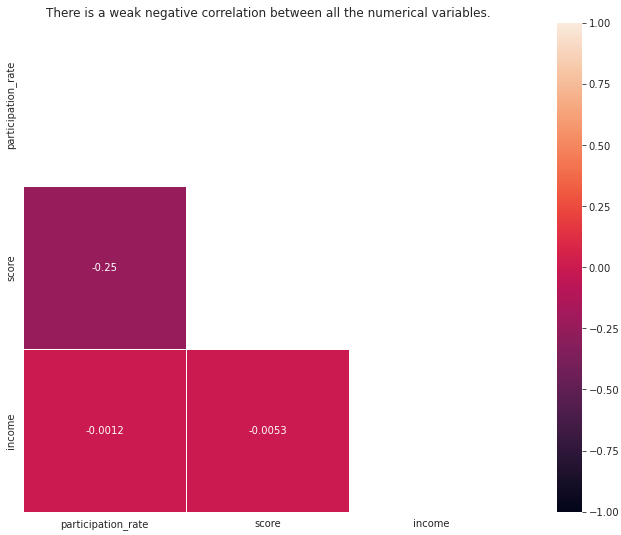

In [56]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = df2.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5).set_title("There is a weak negative correlation between all the numerical variables.")

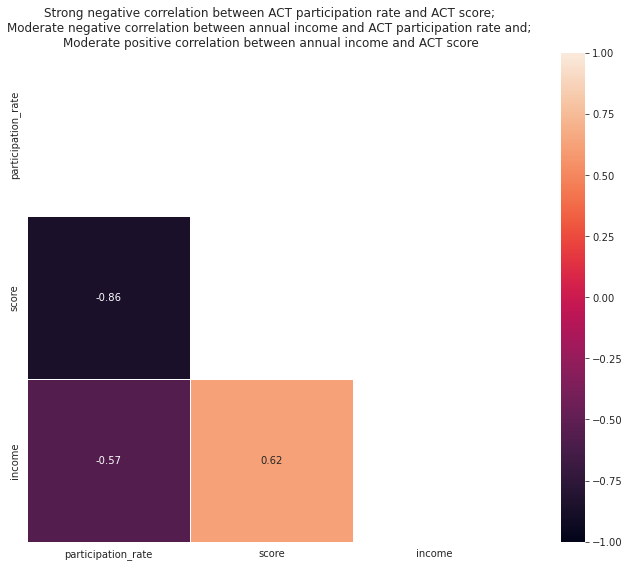

In [57]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = act_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5).set_title("Strong negative correlation between ACT participation rate and ACT score; \nModerate negative correlation between annual income and ACT participation rate and; \nModerate positive correlation between annual income and ACT score")

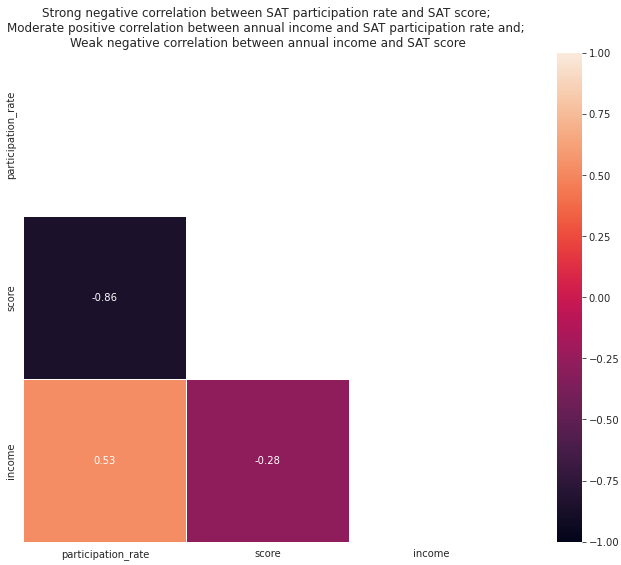

In [58]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = sat_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5).set_title("Strong negative correlation between SAT participation rate and SAT score; \nModerate positive correlation between annual income and SAT participation rate and; \nWeak negative correlation between annual income and SAT score")

The correlation between the numerical variables are quite different in the ACT and SAT dataset. The only similarity would be the strong negative correlation between the participation rate and scores. As they are vastly different, splitting and analysing by the subsets would give us more insights compared to analysing the whole dataset. 

Therefore, we will be using visualing the data by the subsets from this point forth. 

### Investigating 1) ACT score and income relationship throughout the years and 2) SAT score and income relationship throughout the years

Text(0, 0.5, 'Score')

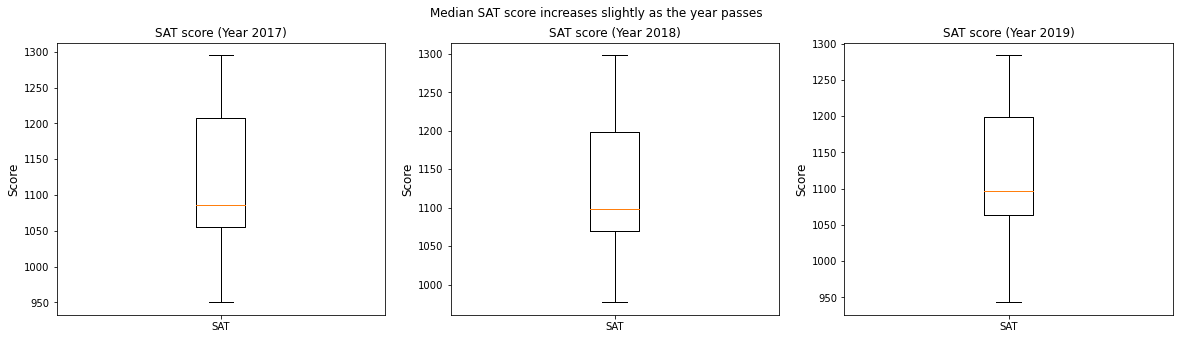

In [59]:
plt.figure(figsize = (20,5))
plt.suptitle("Median SAT score increases slightly as the year passes")

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('SAT score (Year 2017)')
ax1.boxplot(sat_df[sat_df['year'] == '2017']['score'])
ax1.set_xticklabels(['SAT'])
ax1.set_ylabel('Score', fontsize=12)

ax1 = plt.subplot(1, 3, 2)
ax1.set_title('SAT score (Year 2018)')
ax1.boxplot(sat_df[sat_df['year'] == '2018']['score'])
ax1.set_xticklabels(['SAT'])
ax1.set_ylabel('Score', fontsize=12)

ax1 = plt.subplot(1, 3, 3)
ax1.set_title('SAT score (Year 2019)')
ax1.boxplot(sat_df[sat_df['year'] == '2019']['score'])
ax1.set_xticklabels(['SAT'])
ax1.set_ylabel('Score', fontsize=12)

Text(0, 0.5, 'Score')

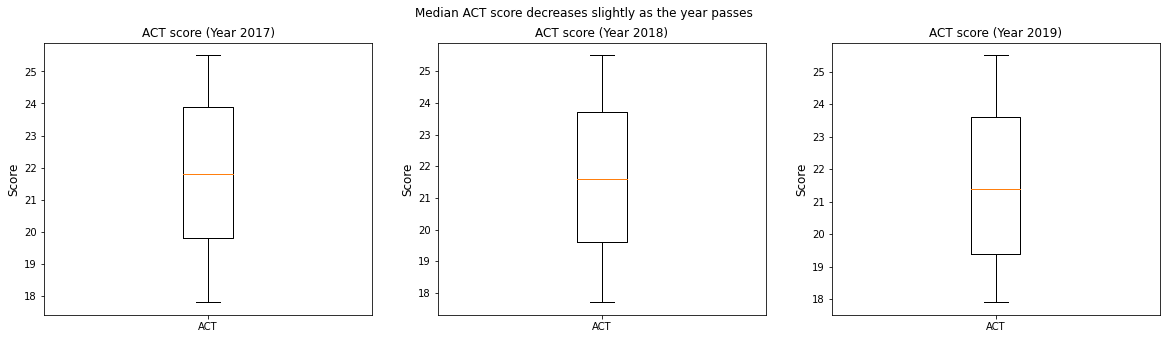

In [60]:
plt.figure(figsize = (20,5))
plt.suptitle("Median ACT score decreases slightly as the year passes")

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('ACT score (Year 2017)')
ax1.boxplot(act_df[act_df['year'] == '2017']['score'])
ax1.set_xticklabels(['ACT'])
ax1.set_ylabel('Score', fontsize=12)

ax1 = plt.subplot(1, 3, 2)
ax1.set_title('ACT score (Year 2018)')
ax1.boxplot(act_df[act_df['year'] == '2018']['score'])
ax1.set_xticklabels(['ACT'])
ax1.set_ylabel('Score', fontsize=12)

ax1 = plt.subplot(1, 3, 3)
ax1.set_title('ACT score (Year 2019)')
ax1.boxplot(act_df[act_df['year'] == '2019']['score'])
ax1.set_xticklabels(['ACT'])
ax1.set_ylabel('Score', fontsize=12)

Text(0, 0.5, 'Income')

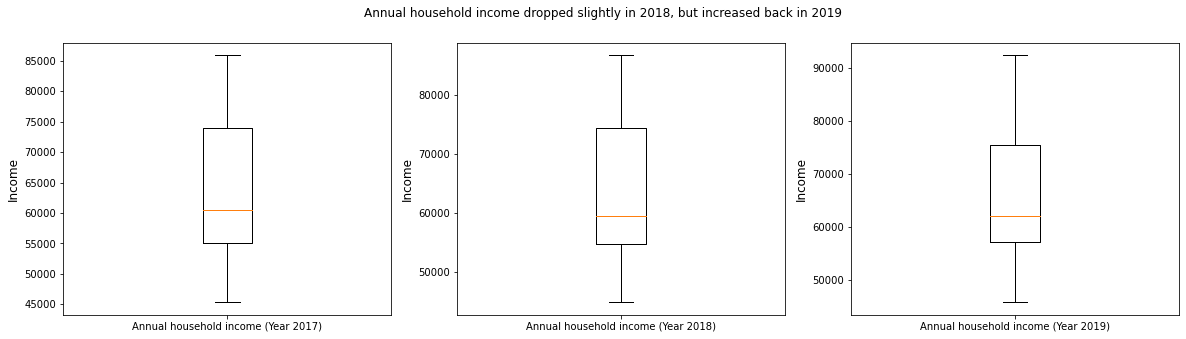

In [61]:
plt.figure(figsize = (20,5))
plt.suptitle("Annual household income dropped slightly in 2018, but increased back in 2019")

ax1 = plt.subplot(1, 3, 1)
ax1.boxplot(df2[df2['year'] == '2017']['income'])
ax1.set_xticklabels(['Annual household income (Year 2017)'])
ax1.set_ylabel('Income', fontsize=12)

ax1 = plt.subplot(1, 3, 2)
ax1.boxplot(df2[df2['year'] == '2018']['income'])
ax1.set_xticklabels(['Annual household income (Year 2018)'])
ax1.set_ylabel('Income', fontsize=12)

ax1 = plt.subplot(1, 3, 3)
ax1.boxplot(df2[df2['year'] == '2019']['income'])
ax1.set_xticklabels(['Annual household income (Year 2019)'])
ax1.set_ylabel('Income', fontsize=12)

From the boxplots, we are unable to see a relationship between the scores and income. This could be due to the weak/moderate correlation between the scores and income. To further visualise the relationship, we looked at the scatter plots.

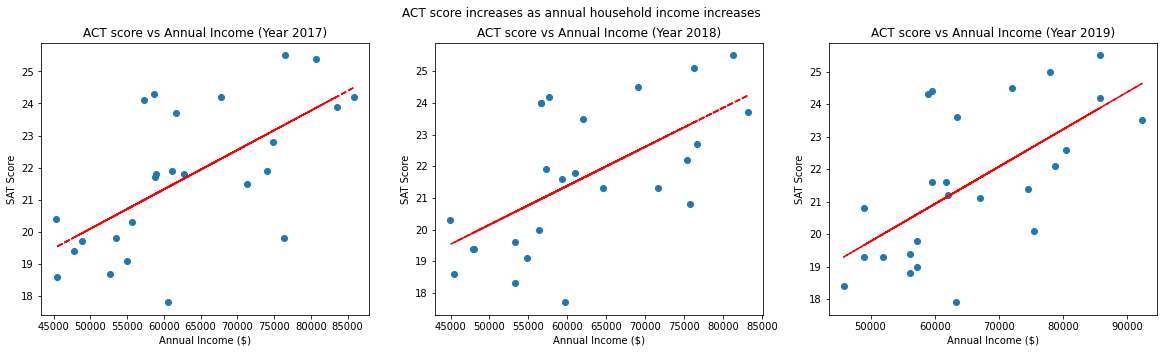

In [62]:
# Establish figure size.
plt.figure(figsize = (20,5))
plt.suptitle("ACT score increases as annual household income increases")

act_df_2017 = act_df[act_df['year'] == '2017']
act_df_2018 = act_df[act_df['year'] == '2018']
act_df_2019 = act_df[act_df['year'] == '2019']

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('ACT score vs Annual Income (Year 2017)')
ax1.scatter(act_df_2017['income'], act_df_2017['score'])
ax1.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(act_df_2017['income'], act_df_2017['score'], 1)
p = np.poly1d(z)
ax1.plot(act_df_2017['income'],p(act_df_2017['income']),"r--")

ax2 = plt.subplot(1, 3, 2)
ax2.set_title('ACT score vs Annual Income (Year 2018)')
ax2.scatter(act_df_2018['income'], act_df_2018['score'])
ax2.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(act_df_2018['income'], act_df_2018['score'], 1)
p = np.poly1d(z)
ax2.plot(act_df_2018['income'],p(act_df_2018['income']),"r--")

ax3 = plt.subplot(1, 3, 3)
ax3.set_title('ACT score vs Annual Income (Year 2019)')
ax3.scatter(act_df_2019['income'], act_df_2019['score'])
ax3.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(act_df_2019['income'], act_df_2019['score'], 1)
p = np.poly1d(z)
ax3.plot(act_df_2019['income'],p(act_df_2019['income']),"r--")


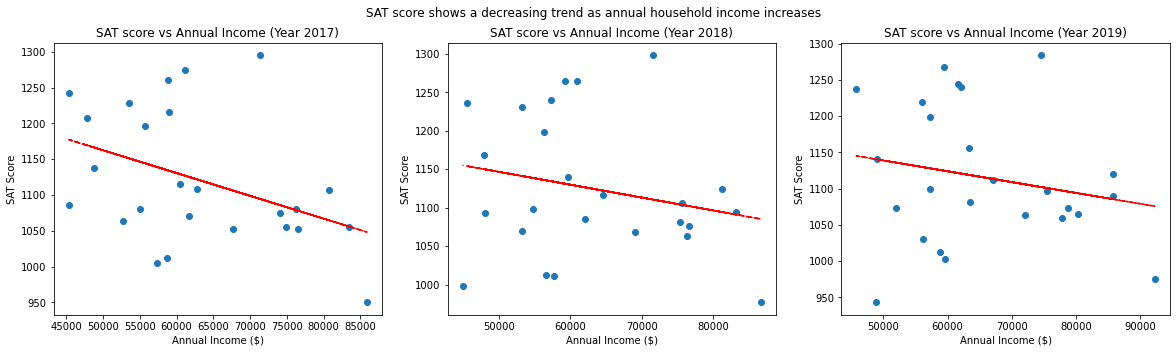

In [63]:
# Establish figure size.
plt.figure(figsize = (20,5))
plt.suptitle("SAT score shows a decreasing trend as annual household income increases")

sat_df_2017 = sat_df[(sat_df['year'] == '2017') ]
sat_df_2018 = sat_df[(sat_df['year'] == '2018') ]
sat_df_2019 = sat_df[(sat_df['year'] == '2019') ]

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('SAT score vs Annual Income (Year 2017)')
ax1.scatter(sat_df_2017['income'], sat_df_2017['score'])
ax1.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(sat_df_2017['income'], sat_df_2017['score'], 1)
p = np.poly1d(z)
ax1.plot(sat_df_2017['income'],p(sat_df_2017['income']),"r--")

ax2 = plt.subplot(1, 3, 2)
ax2.set_title('SAT score vs Annual Income (Year 2018)')
ax2.scatter(sat_df_2018['income'], sat_df_2018['score'])
ax2.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(sat_df_2018['income'], sat_df_2018['score'], 1)
p = np.poly1d(z)
ax2.plot(sat_df_2018['income'],p(sat_df_2018['income']),"r--")

ax3 = plt.subplot(1, 3, 3)
ax3.set_title('SAT score vs Annual Income (Year 2019)')
ax3.scatter(sat_df_2019['income'], sat_df_2019['score'])
ax3.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(sat_df_2019['income'], sat_df_2019['score'], 1)
p = np.poly1d(z)
ax3.plot(sat_df_2019['income'],p(sat_df_2019['income']),"r--")


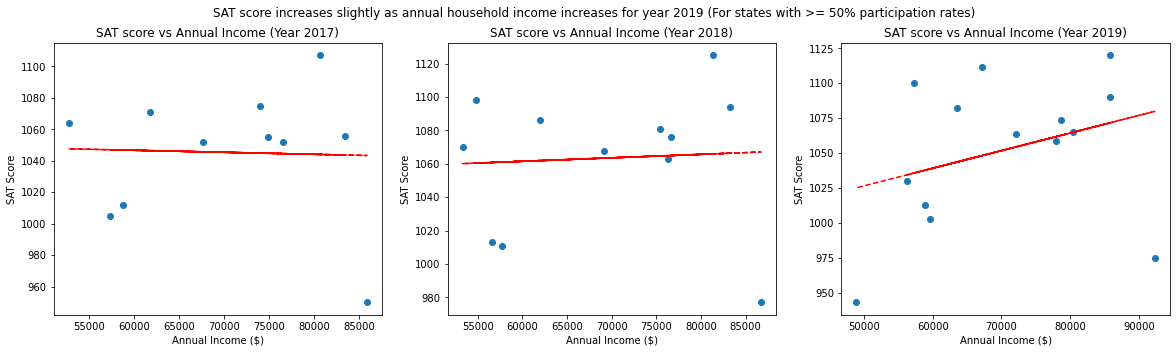

In [64]:
# Establish figure size.
plt.figure(figsize = (20,5))
plt.suptitle("SAT score increases slightly as annual household income increases for year 2019 (For states with >= 50% participation rates)")

sat_df_2017 = sat_df[(sat_df['year'] == '2017') & (sat_df['participation_rate']>= 0.5)]
sat_df_2018 = sat_df[(sat_df['year'] == '2018') & (sat_df['participation_rate']>= 0.5)]
sat_df_2019 = sat_df[(sat_df['year'] == '2019') & (sat_df['participation_rate']>= 0.5)]

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('SAT score vs Annual Income (Year 2017)')
ax1.scatter(sat_df_2017['income'], sat_df_2017['score'])
ax1.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(sat_df_2017['income'], sat_df_2017['score'], 1)
p = np.poly1d(z)
ax1.plot(sat_df_2017['income'],p(sat_df_2017['income']),"r--")

ax2 = plt.subplot(1, 3, 2)
ax2.set_title('SAT score vs Annual Income (Year 2018)')
ax2.scatter(sat_df_2018['income'], sat_df_2018['score'])
ax2.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(sat_df_2018['income'], sat_df_2018['score'], 1)
p = np.poly1d(z)
ax2.plot(sat_df_2018['income'],p(sat_df_2018['income']),"r--")

ax3 = plt.subplot(1, 3, 3)
ax3.set_title('SAT score vs Annual Income (Year 2019)')
ax3.scatter(sat_df_2019['income'], sat_df_2019['score'])
ax3.set(xlabel='Annual Income ($)', ylabel = 'SAT Score')
z = np.polyfit(sat_df_2019['income'], sat_df_2019['score'], 1)
p = np.poly1d(z)
ax3.plot(sat_df_2019['income'],p(sat_df_2019['income']),"r--")


As we know from our pairplot, heatmap and scatter plot that there is a negative correlation between the SAT score and the household annual income, we tried looking at the SAT score vs the household annual income when the participation rate is >= 50%. Interestingly, there seems to be little to no correlation in year 2017 and 2018, but there is a weak positive correlation for year 2019. Since the correlation seems to be weak, we can ignore this.

## Conclusions and Recommendations

**Conclusion:** 

- There exist a slight relationship between the annual household income and their ACT scores. As students with higher annual household income achieves a higher ACT score, there exist a biasness due to socioeconomic differences. 

- As for the SAT score, we observed minimal correlation between the annual household income and SAT score. Thus, we conclude there is little to no relationship between the annual household income and their SAT scores.

**Recommendations:**

- The ACT system should be abolished and students should take SAT as part of the college entrance examinations. This will allow students from a less wealthy family gets to go to the school of their choice if they have the academic ability (scored via SAT). 

- Financial support could also be given to students from less wealthy families who are taking the ACT to support them and help them in their ACT scores.
